In [2]:
import os
import glob
import numpy as np

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.figsize"] = (16, 3.5)
plt.rcParams['figure.dpi'] = 150

import warnings
warnings.filterwarnings('ignore')

In [32]:
def read_program(data_folder, validate_folders, program_no, header, drop_cols):
    program = os.listdir(os.path.join(data_folder, validate_folders[program_no], 'One_Die'))
    program = [csv_file for csv_file in program if csv_file.endswith('.csv')]

    df = []
    for csv_file in program:
        csv_path = os.path.join(data_folder, validate_folders[program_no], 'One_Die', csv_file)
        df.append(pd.read_csv(csv_path, header=header).reset_index(drop=True).drop(drop_cols, axis=1))
    
    df = pd.concat(df, ignore_index=True)
    return df

In [68]:
labels = pd.read_excel('all_program_cropped.xlsx')
label_df_group = labels.groupby('program')  
validate_programs = [program for program, group in label_df_group]

data_folder = \
        '/Users/hlinh96it/Library/CloudStorage/OneDrive-NTHU/ASE_PHM_WireBonding/dataset/10_DAQ_20221227'
validate_folders = os.listdir(data_folder)
validate_folders = [folder for folder in validate_folders if folder[2:] in validate_programs]

### Visualize cropping results for program ENM0027FST

In [69]:
# drop_cols = ['Date_Time', 'X', 'Y', 'id']
drop_cols = [0, 1, 2, 5]

program_no = 1
program_1 = read_program(data_folder, validate_folders, program_no, header=None, drop_cols=drop_cols)
program_1_labels = label_df_group.get_group(validate_folders[program_no][2:])
print(validate_folders[1])

3、ENM0027FST


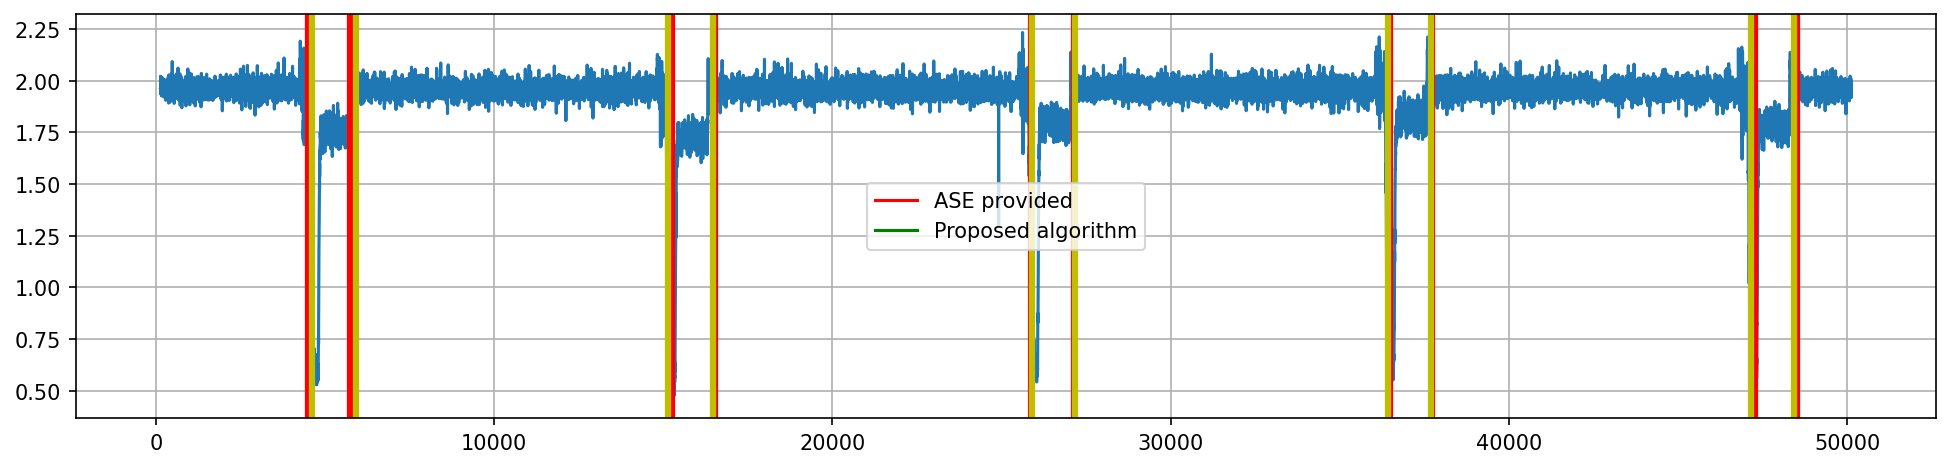

In [82]:
start_test, end_test = program_1_labels['start'].min(), program_1_labels['end'].max()
start_plot, end_plot = start_test, start_test+50000

crop_index = program_1_labels[['start_label', 'end_label', 'start', 'end']]
crop_index = crop_index[(crop_index['start'] >= start_plot) & (crop_index['end'] <= end_plot)]

crop_labels = crop_index[['start_label', 'end_label']].values.flatten()
crop_proposed = crop_index[['start', 'end']].values.flatten()

plt.plot(np.arange(start_plot, end_plot)-4481, program_1[start_plot: end_plot][4], label='Piezo signal')
for ii in crop_labels:
    plt.axvline(ii, c='r', linewidth=3.0)
for jj in crop_proposed:
    plt.axvline(jj, c='y', linewidth=3.0)

legend_obj_1 = plt.Line2D([0], [0], color='r', label='ASE provided')
legend_obj_2 = plt.Line2D([0], [0], color='g', label='Proposed algorithm')
plt.legend(handles=[legend_obj_1, legend_obj_2])
plt.show()

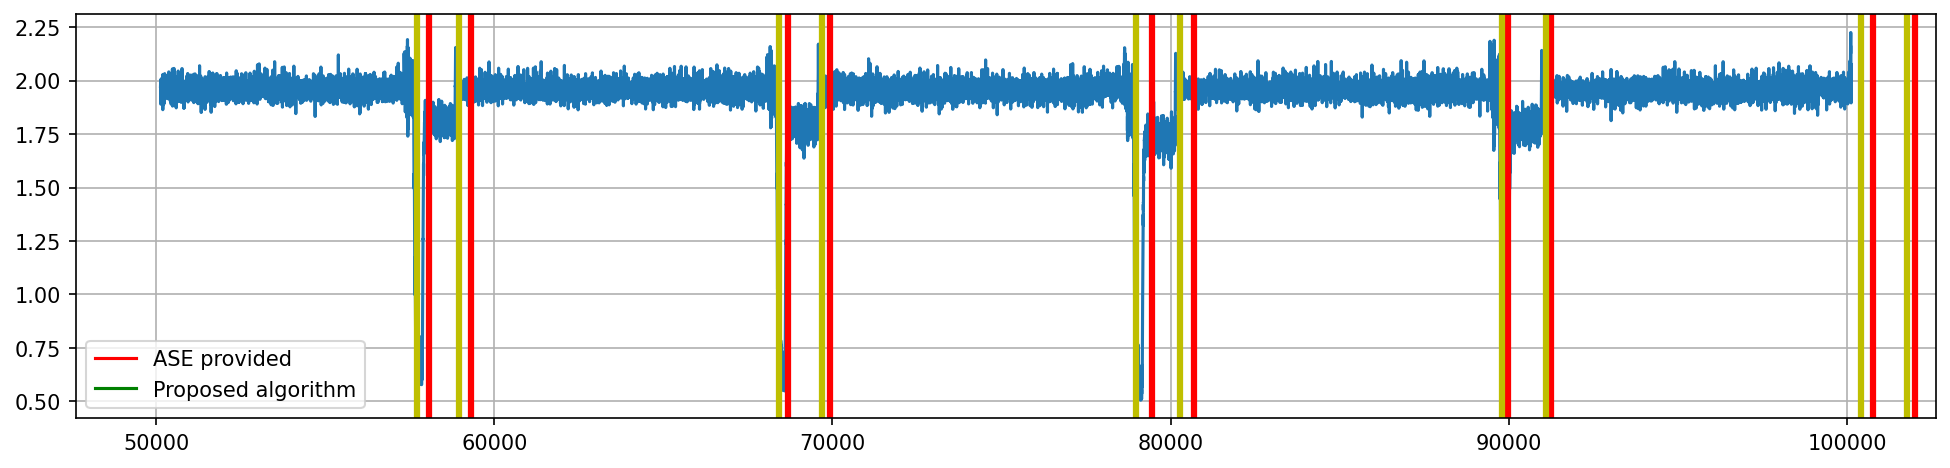

In [83]:
start_test, end_test = program_1_labels['start'].min(), program_1_labels['end'].max()
start_plot, end_plot = start_test+50000, start_test+100000

crop_index = program_1_labels[['start_label', 'end_label', 'start', 'end']]
crop_index = crop_index[(crop_index['start'] >= start_plot) & (crop_index['end'] <= end_plot)]

crop_labels = crop_index[['start_label', 'end_label']].values.flatten()
crop_proposed = crop_index[['start', 'end']].values.flatten()

plt.plot(np.arange(start_plot, end_plot)-4481, program_1[start_plot: end_plot][4])
for ii in crop_labels:
    plt.axvline(ii, c='r', linewidth=3.0)
for jj in crop_proposed:
    plt.axvline(jj, c='y', linewidth=3.0)
    
legend_obj_1 = plt.Line2D([0], [0], color='r', label='ASE provided')
legend_obj_2 = plt.Line2D([0], [0], color='g', label='Proposed algorithm')
plt.legend(handles=[legend_obj_1, legend_obj_2])

plt.show()